# Michał Szczurek lab 9

In [1]:
import numpy as np
from sympy import *
x = symbols('x')
y = symbols('y')
import numpy.linalg as la
import math
import scipy.optimize as sopt
import matplotlib.pyplot as plt

### Zadanie 1. zostało rozwiązane "na kartce". Poniżej znajduje się kod zadania 2.

In [2]:
def plot_cmp(res1, vec, n=10):
    x = np.linspace(1,n,n)
    r1 = [x for [x,y] in res1]
    r2 = [y for [x,y] in res1]
    plt.plot(x, r1, label="Wartości $x_1$")
    plt.plot(x, r2, label="Wartości $x_2$")
    plt.legend()
    plt.ylabel("Numer iteracji")
    plt.title(f"Metoda największego spadku dla wartości początkowych [{vec[0]}, {vec[1]}]")
    plt.show()

In [3]:
func =  100*(y - x**2)**2 + (1-x)**2

In [4]:
def d2(func, x, y=None):
    if y is None:
        return diff(diff(func,x),x)
    else:
        return diff(diff(func,x),y)

def newton(func, vec, n=10, printing=False):
    vec = np.array(vec).T
    hess = np.array([[d2(func, x), d2(func, x, y)],
                    [d2(func, x, y),  d2(func,y)]])
    grad = np.array([diff(func,x), diff(func,y)]).T
    res = []
    for i in range(n):
        curr_h = np.zeros((2,2))
        curr_h[0,0] = hess[0,0].subs(y,vec[1]).subs(x,vec[0])
        curr_h[1,1] = hess[1,1].subs(y,vec[1]).subs(x,vec[0])
        curr_h[1,0] = hess[1,0].subs(y,vec[1]).subs(x,vec[0])
        curr_h[0,1] = curr_h[1,0]
        curr_grad = np.zeros(2)
        curr_grad[0] =grad[0].subs(y,vec[1]).subs(x,vec[0])
        curr_grad[1] =grad[1].subs(y,vec[1]).subs(x,vec[0])
        vec = vec - np.linalg.inv(curr_h) @ curr_grad
        res.append(vec)
        if printing:
            print(i+1,":",vec)
    return res

In [5]:
def gold_ratio_opt(f, a=0, b=4, error=10e-9):
    r=(math.sqrt(5)-1)/2
    a1=b-r*(b-a)
    a2=a+r*(b-a)
    while abs(b-a)>error:
        f1=f(a1)
        f2=f(a2)
        if f1>f2:
            a=a1
            a1=a2
            a2=a+r*(b-a)
        else:
            b=a2
            a2=a1
            a1=b-r*(b-a)
        x_opt=(a+b)/2
    return x_opt

In [6]:
def f(x):
    return 100*(x[1] - x[0]**2)**2 + (1-x[0])**2

def df(x):
    return np.array([-400*x[0]*(-x[0]**2+x[1]) + 2*x[0] -2, -200*x[0]**2 + 200*x[1]])

def steepest_grad(f, df, vec, n=10, printing=False):
    res = []
    def f1d(alpha):
        return f(vec + alpha*s)
    for i in range(n):
        s = -df(vec)
        lr = gold_ratio_opt(f1d)
        vec = vec + lr * s
        res.append(vec)
        if printing:
            print(i+1, ":", vec)   
    return res

In [7]:
vec = [-1,1]

In [8]:
res = steepest_grad(f, df, vec, printing=True)

1 : [1. 1.]
2 : [1. 1.]
3 : [1. 1.]
4 : [1. 1.]
5 : [1. 1.]
6 : [1. 1.]
7 : [1. 1.]
8 : [1. 1.]
9 : [1. 1.]
10 : [1. 1.]


In [9]:
res = newton(func, vec, printing=True)

1 : [ 1. -3.]
2 : [1. 1.]
3 : [1. 1.]
4 : [1. 1.]
5 : [1. 1.]
6 : [1. 1.]
7 : [1. 1.]
8 : [1. 1.]
9 : [1. 1.]
10 : [1. 1.]


In [10]:
vec = [0, 1]

1 : [9.99999378e-03 6.22167055e-07]
2 : [0.16583412 0.00156522]
3 : [0.16557542 0.02733171]
4 : [0.21555392 0.02783354]
5 : [0.21536845 0.04630513]
6 : [0.24905667 0.04664336]
7 : [0.24890372 0.06187803]
8 : [0.27490455 0.06213907]
9 : [0.27477114 0.07542677]
10 : [0.29618873 0.0756418 ]


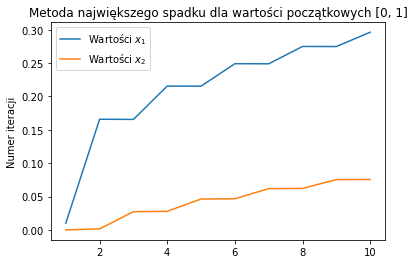

In [11]:
res = steepest_grad(f, df, vec, printing=True)
plot_cmp(res, vec)

In [12]:
res = newton(func, vec, printing=True)

1 : [-0.00502513  0.        ]
2 : [ 0.99494975 -0.01002475]
3 : [0.99497488 0.989975  ]
4 : [1.         0.99997475]
5 : [1. 1.]
6 : [1. 1.]
7 : [1. 1.]
8 : [1. 1.]
9 : [1. 1.]
10 : [1. 1.]


In [13]:
vec = [2, 1]

1 : [-1.35192908  1.83728453]
2 : [-1.35283053  1.83363257]
3 : [1.10722931 1.2263924 ]
4 : [1.1066757  1.22415029]
5 : [1.10626394 1.22425196]
6 : [1.10571601 1.22203289]
7 : [1.10530773 1.2221337 ]
8 : [1.10476549 1.21993757]
9 : [1.10436069 1.22003752]
10 : [1.10382402 1.21786395]


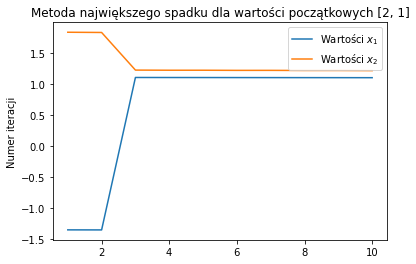

In [14]:
res = steepest_grad(f, df, vec, printing=True)
plot_cmp(res, vec)

In [15]:
res = newton(func, vec, printing=True)

1 : [1.99833611 3.99334443]
2 : [1.00055248 0.0055331 ]
3 : [1.00054972 1.00109974]
4 : [1.        0.9999997]
5 : [1. 1.]
6 : [1. 1.]
7 : [1. 1.]
8 : [1. 1.]
9 : [1. 1.]
10 : [1. 1.]


In [16]:
vec = [3,4]

In [17]:
res = steepest_grad(f, df, vec)
print(res[-1])

[-2.18534156  4.77896938]


In [18]:
res = newton(func, vec)
print(res[-1])

[1. 1.]


In [19]:
vec = [-4,5]

In [20]:
res = steepest_grad(f, df, vec)
print(res[-1])

[-1.91418919  3.62914443]


In [21]:
res = newton(func, vec)
print(res[-1])

[1. 1.]


In [22]:
vec = [-14,8]

In [23]:
res = steepest_grad(f, df, vec)
print(res[-1])

[2.93264763 8.60305413]


In [24]:
res = newton(func, vec)
print(res[-1])

[1. 1.]


In [25]:
vec = [300,-1000]

In [26]:
res = steepest_grad(f, df, vec)
print(res[-1])

[ 9.75924627e-01 -9.84955516e+02]


In [27]:
res = newton(func, vec)
print(res[-1])

[1. 1.]


[1. 1.]


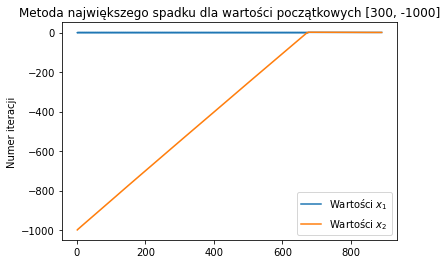

In [31]:
res = steepest_grad(f, df, vec, n=890)
print(res[-1])
plot_cmp(res, vec, n=890)